In [2]:

import pandas as pd


In [18]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\Data analyst intern\\spam.csv",encoding='latin1')


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Explore the Data

In [5]:
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [6]:
data = df.rename(columns={'<original_label_column_name>': 'label', '<original_text_column_name>': 'text'})
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, errors='ignore')
data.columns = ['label', 'text']


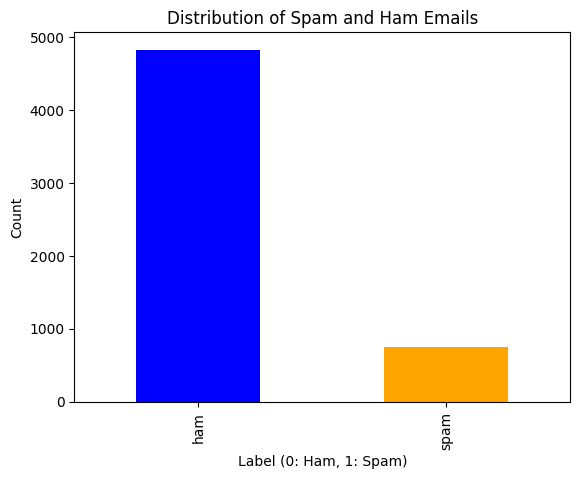

In [7]:
import matplotlib.pyplot as plt

# Plot the distribution of labels
data['label'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()

Preprocess the data

In [15]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer # type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences # type: ignore

# Encode labels
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
padded_sequences = pad_sequences(sequences, maxlen=100)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['label'], test_size=0.2, random_state=42)

Build the model

In [17]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Flatten, Embedding # type: ignore

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8940 - loss: 0.2987 - val_accuracy: 0.9731 - val_loss: 0.0976
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9915 - loss: 0.0408 - val_accuracy: 0.9883 - val_loss: 0.0563
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9976 - loss: 0.0121 - val_accuracy: 0.9848 - val_loss: 0.0498
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9977 - loss: 0.0075 - val_accuracy: 0.9830 - val_loss: 0.0598
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 0.9821 - val_loss: 0.0585


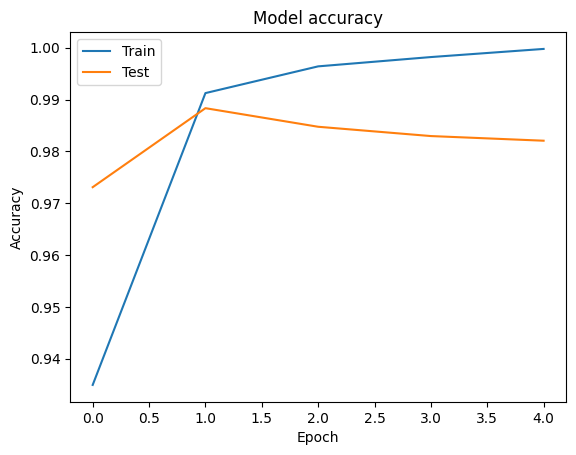

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

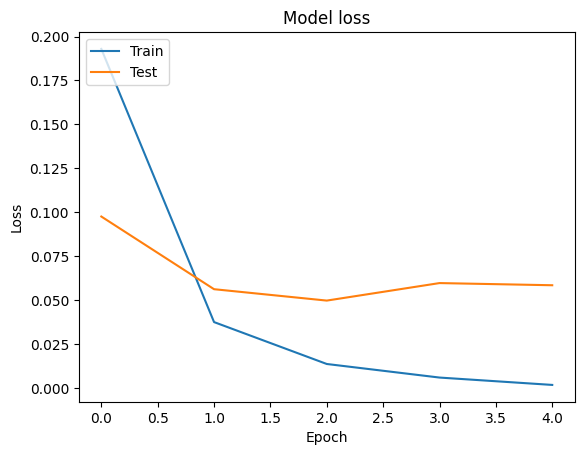

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9861 - loss: 0.0409
Accuracy: 98.21%
